In [1]:
import numpy as np
import pandas as pd

pd.options.display.float_format ='{:,.4f}'.format

In [2]:
#random으로 100,000개 관측개체 X 10변수
난수개수 = 100000
변수개수 = 10
values = np.random.random((난수개수, 변수개수))# 난수 생성
df = pd.DataFrame(values)
df

,0,1,2,3,4,5,6,7,8,9
0,0.0920,0.7445,0.0998,0.8197,0.9221,0.7033,0.9407,0.7866,0.7943,0.3687
1,0.8380,0.9759,0.9613,0.9401,0.5545,0.4744,0.6102,0.0719,0.8165,0.3546
2,0.3765,0.0143,0.6231,0.4755,0.9187,0.2138,0.2814,0.1157,0.4695,0.0729
3,0.0663,0.0862,0.4757,0.5172,0.2152,0.6615,0.1177,0.2368,0.5583,0.4574
4,0.7970,0.3693,0.8625,0.8832,0.7024,0.8496,0.2042,0.5082,0.4817,0.2429
...,...,...,...,...,...,...,...,...,...,...
99995,0.0885,0.8727,0.7511,0.8401,0.3395,0.2251,0.9226,0.7236,0.7175,0.5748
99996,0.6055,0.6078,0.0825,0.0338,0.7491,0.8998,0.0368,0.9709,0.2390,0.2955
99997,0.9147,0.9093,0.2769,0.2125,0.3403,0.9216,0.3922,0.1873,0.7326,0.5595
99998,0.9332,0.4181,0.4892,0.2164,0.8559,0.3394,0.8338,0.9139,0.3642,0.4553


## Pandas DataFrame
#### > info(): DF에 대한 기본정보(행과열의 수, 각 열의 데이터 타입 등)
#### > shape:행과 열의 수
#### > dtypes:변수(열)의 데이터 형식
#### > columns: 변수 명
####     >전체 열 이름 변경: df.columns=[..]
####     >열 이름 부분 변경: df.rename(columns={'0':'A', '1':'B'}, inplace=True)
#### > head(): 앞 부분 5개 return ->데이터 선택
#### > tail(): 뒷 부분 5개 return -> 뒷부분 데이터 선택
#### > loc: index(행) 이름 해당 또는 T/F값에 따른 데이터 선택
#### >iloc:번호로 행/열 데이터 선택
#### > query(): 열들에 대해 boolean 연산결과로 rows 선택
####     > Ex: df.query('A > B' )#df[df.A>df.B] 와 동일


In [3]:
df.columns=['A','B','C','D','E','F','G','H','I','J']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   A       100000 non-null  float64
 1   B       100000 non-null  float64
 2   C       100000 non-null  float64
 3   D       100000 non-null  float64
 4   E       100000 non-null  float64
 5   F       100000 non-null  float64
 6   G       100000 non-null  float64
 7   H       100000 non-null  float64
 8   I       100000 non-null  float64
 9   J       100000 non-null  float64
dtypes: float64(10)
memory usage: 7.6 MB


In [4]:
test = df.head(n=10)

In [5]:
test.tail()

,A,B,C,D,E,F,G,H,I,J
5,0.4489,0.4909,0.7725,0.2022,0.8953,0.5092,0.8173,0.7625,0.1443,0.4925
6,0.4394,0.3217,0.1132,0.2208,0.8095,0.3704,0.2286,0.9346,0.4471,0.5666
7,0.9303,0.7911,0.5430,0.5337,0.4684,0.8183,0.1370,0.4674,0.2443,0.0493
8,0.6201,0.0116,0.6107,0.2698,0.0358,0.3431,0.3442,0.0320,0.3502,0.9311
9,0.7490,0.1973,0.5404,0.2042,0.3305,0.1897,0.0621,0.3288,0.2298,0.9059


## 작업속도비교

##### timeit으로 실행 ->측정한 시간을 비교

In [6]:
#결과를 저장할 빈 데이터 프레임 생성
df_result = pd.DataFrame(columns=['read','write'])
df_result.head()

,read,write


In [8]:
!pip install openpyxl# 엑셀을 읽고 쓰는게 가능해짐

In [ ]:
#EXCEL -> 시간이 많이 걸리므로 실행 x
tm = %timeit -o df.to_excel('test_data.xlsx')
df_result.loc['excel','write'] = tm.best
tm = %timeit -o df = pd.read_excel('test_data.xlsx')
df_result.loc['excel','read'] = tm.best

44.7 s ± 860 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
#CSV
tm = %timeit -o df.to_csv('test_data.csv')
df_result.loc['csv','write'] = tm.best
tm = %timeit -o df = pd.read_csv('test_data.csv')
df_result.loc['csv','read'] = tm.best

1.14 s ± 15.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
160 ms ± 1.39 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [8]:
#pickle
tm = %timeit -o df.to_pickle('test_data.pickle')
df_result.loc['pickle','write'] = tm.best
tm = %timeit -o df = pd.read_pickle('test_data.pickle')
df_result.loc['pickle','read'] = tm.best

2.25 ms ± 24.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.75 ms ± 139 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [9]:
#feather
tm = %timeit -o df.to_feather('test_data.ftr')
df_result.loc['feather','write'] = tm.best
tm = %timeit -o df = pd.read_feather('test_data.ftr')
df_result.loc['feather','read'] = tm.best

8.07 ms ± 83.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
6.21 ms ± 83.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### parquet(파케이):
##### > 많은 빅데이터  처리 프레임 워크 및 플랫폼 지원
##### > 다양한 I/O 최적화를 제공하는 오픈소스 칼럼 기반 파일 형식

In [10]:
tm = %timeit -o df.to_parquet('test_data.parquet')
df_result.loc['parquet','write'] = tm.best
tm = %timeit -o df = pd.read_parquet('test_data.parquet')
df_result.loc['parquet','read'] = tm.best

66 ms ± 1.33 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
10.2 ms ± 113 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Spark 기본 데이터 소스
##### > Parquet files
##### > ORC files
##### > json files
##### > csv files
##### > Text files
##### > Hive tables
##### > JDBC to other databases
##### > Avro files
##### > Binary file: Ex, image file

In [11]:
df_result

,read,write
csv,0.1582,1.1177
pickle,0.0026,0.0022
feather,0.0061,0.0080
parquet,0.0101,0.0649


In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.figsize'] =(10,5) 
plt.rcParams['font.size'] = 20 

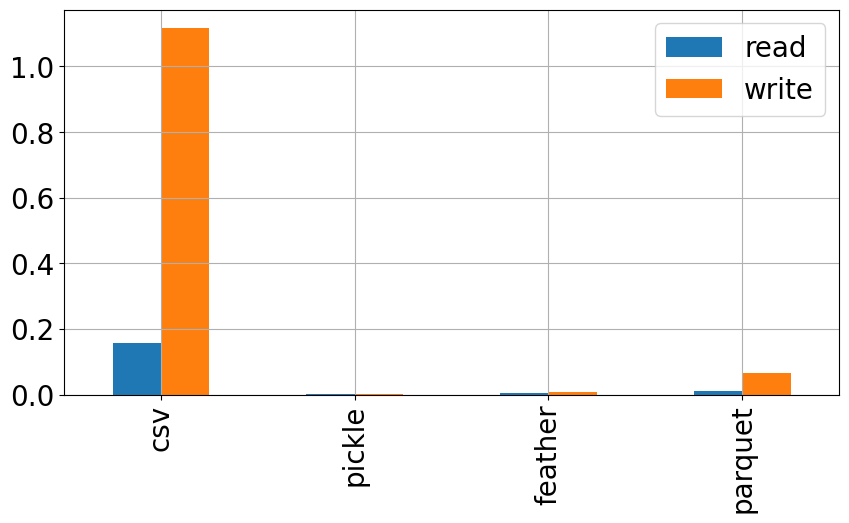

In [15]:
df_result
df_result.plot(kind='bar')
plt.show()